YF.download() has changed argument auto_adjust default to True
Data saved to 'Token Close Price.xlsx'


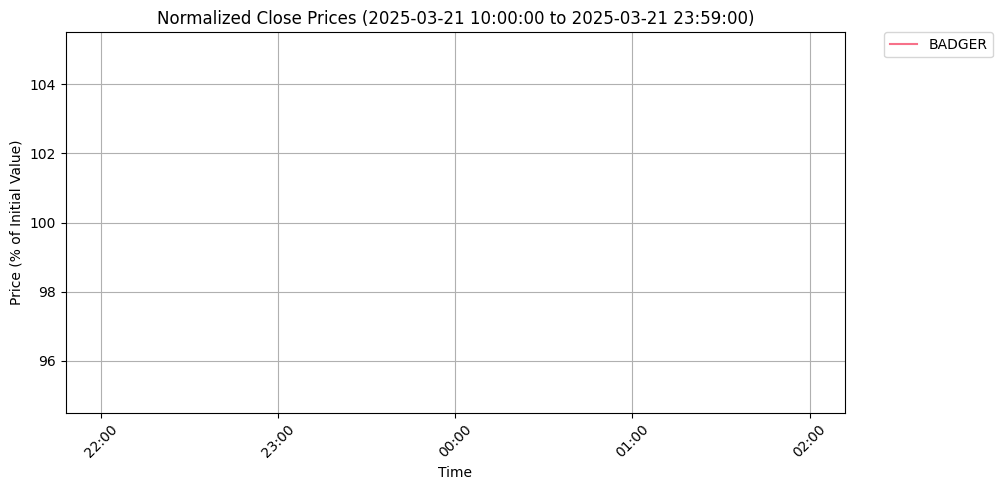

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator

# better L7D
# Define token tickers in one line (edit here for future changes)
tickers = [
    "BADGER-USD"
]  # Add or remove tokens as needed

# Define editable start and end dates
start_date = "2025-03-21 10:00:00"
end_date = "2025-03-21 23:59:00"

# Convert strings to datetime objects
start_dt = pd.to_datetime(start_date)
end_dt = pd.to_datetime(end_date)

# Fetch 1-hour Close data for defined tickers
data = yf.download(tickers, start=start_dt, end=end_dt, interval="1d", progress=False)["Close"]

# Check if data is empty
if data.empty:
    print("No data retrieved. Check date range or tickers.")
    exit()

# Create DataFrame and ensure numeric data
df = pd.DataFrame(data)
for ticker in tickers:
    df[ticker] = pd.to_numeric(df[ticker], errors="coerce")
df = df.dropna()

# Normalize prices (percentage change from first value)
normalized_data = {ticker: df[ticker] / df[ticker].iloc[0] * 100 for ticker in tickers}

# Convert timezone-aware index to timezone-unaware for Excel
df.index = df.index.tz_localize(None)

# Save data to Excel
df.to_excel(f"Token Close Price.xlsx")
print(f"Data saved to 'Token Close Price.xlsx'")

# Create figure for normalized prices
fig, ax = plt.subplots(figsize=(10, 5))

# Plot normalized Close prices with distinct colors
colors = sns.color_palette("husl", len(tickers))
for ticker, color in zip(tickers, colors):
    ax.plot(df.index, normalized_data[ticker], color=color, label=f"{ticker.split('-')[0]}")
ax.set_ylabel("Price (% of Initial Value)")
ax.set_title(f"Normalized Close Prices ({start_date} to {end_date})")
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Format x-axis to show time (HH:MM) with hourly intervals
ax.xaxis.set_major_locator(HourLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
ax.set_xlabel("Time")
plt.xticks(rotation=45)

# Adjust layout for legend
plt.tight_layout()
fig.subplots_adjust(right=0.85)

plt.show()